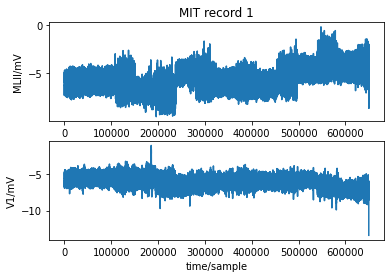

{'record_name': '118e12',
 'n_sig': 2,
 'fs': 360,
 'counter_freq': None,
 'base_counter': None,
 'sig_len': 650000,
 'base_time': None,
 'base_date': None,
 'comments': ["Created by `nst' from records 118 and em (SNR = 12 dB)"],
 'sig_name': ['MLII', 'V1'],
 'p_signal': array([[ -5.955,  -5.635],
        [ -5.955,  -5.635],
        [ -5.955,  -5.635],
        ...,
        [ -3.52 ,  -8.25 ],
        [ -3.465,  -8.29 ],
        [ -8.58 , -13.405]]),
 'd_signal': None,
 'e_p_signal': None,
 'e_d_signal': None,
 'file_name': ['118e12.dat', '118e12.dat'],
 'fmt': ['212', '212'],
 'samps_per_frame': [1, 1],
 'skew': [None, None],
 'byte_offset': [None, None],
 'adc_gain': [200.0, 200.0],
 'baseline': [1024, 1024],
 'units': ['mV', 'mV'],
 'adc_res': [11, 11],
 'adc_zero': [0, 0],
 'init_value': [-167, -103],
 'checksum': [-10416, -23139],
 'block_size': [0, 0]}

In [120]:
from IPython.display import display

import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline
import numpy as np
import os
import librosa
import shutil
import posixpath

if "record" is locals():
    os.chdir("mit-database/")

import wfdb

# Demo 1 - Read a WFDB record using the 'rdrecord' function into a wfdb.Record object.
# Plot the signals, and show the data.
#this reads and plots a noisy record from the MIT stress test database, along with all the information about the record/patient
#NOTE: do not use this function if you want to further manipulate the ECG data. instead, use wfdb.rdsamp
record = wfdb.rdrecord('118e12') 
wfdb.plot_wfdb(record=record, title='MIT record 1') 
display(record.__dict__)

In [129]:
# Demo 2 - Read certain channels and sections of the WFDB record using the simplified 'rdsamp' function
# which returns a numpy array and a dictionary. Show the data.
#this section reads a portion of the same record as above (from sample 100 to sample 15000)
#returns a "signals" (a numpy array) and "fields"(patient and signal info)
#note: this ecg has data from 2 channels (2 different leads), if you want data from a specific lead, you have to 
#select the correct channel that corresponds to the leads(channels start at 0, not 1)

#NOTE: use this function whenever you want to work with the ECG data (not rdrecord)

signals, fields = wfdb.rdsamp('118e06', channels=[1], sampfrom=108600, sampto= 112200) #194400)
display(signals)
display(fields)

signals7, fields7 = wfdb.rdsamp('118e00', channels=[1], sampfrom=108600, sampto= 112200) #194400)
display(signals7)
display(fields7)

array([[-6.695],
       [-6.82 ],
       [-6.79 ],
       ...,
       [-6.305],
       [-6.335],
       [-6.4  ]])

{'fs': 360,
 'sig_len': 3600,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['V1'],
 'comments': ["Created by `nst' from records 118 and em (SNR = 6 dB)"]}

array([[-7.86],
       [-8.08],
       [-8.03],
       ...,
       [-6.61],
       [-6.64],
       [-6.76]])

{'fs': 360,
 'sig_len': 3600,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['V1'],
 'comments': ["Created by `nst' from records 118 and em (SNR = 0 dB)"]}

No handles with labels found to put in legend.


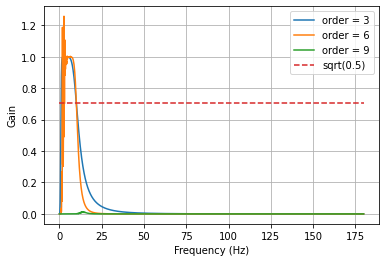

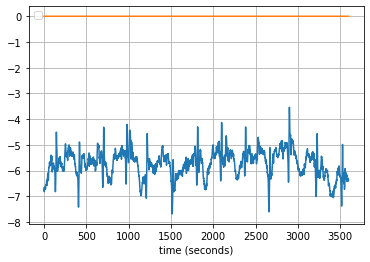

-199.99992985381343

array([[1.165],
       [1.26 ],
       [1.24 ],
       ...,
       [0.305],
       [0.305],
       [0.36 ]])

In [133]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=6):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


def run():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.signal import freqz

    # Sample rate and desired cutoff frequencies (in Hz).
    fs = 360 #5000.0
    lowcut = 1 #500.0
    highcut = 10 #1250.0

    # Plot the frequency response for a few different orders.
    plt.figure(1)
    plt.clf()
    for order in [3, 6, 9]:
        b, a = butter_bandpass(lowcut, highcut, fs, order=order)
        w, h = freqz(b, a, worN=2000)
        plt.plot((fs * 0.5 / np.pi) * w, abs(h), label="order = %d" % order)

    plt.plot([0, 0.5 * fs], [np.sqrt(0.5), np.sqrt(0.5)],
             '--', label='sqrt(0.5)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Gain')
    plt.grid(True)
    plt.legend(loc='best')

    # Filter a noisy signal.
    T = 0.05
    #nsamples = int(T * fs)
    #t = np.linspace(0, T, nsamples, endpoint=False)
    t = np.linspace(0,3600, 3600)
    #a = 0.02
    f0 = 600.0
    #x = 0.1 * np.sin(2 * np.pi * 1.2 * np.sqrt(t))
    #x += 0.01 * np.cos(2 * np.pi * 312 * t + 0.1)
    #x += a * np.cos(2 * np.pi * f0 * t + .11)
    #x += 0.03 * np.cos(2 * np.pi * 2000 * t)
    x = signals
    plt.figure(2)
    plt.clf()
    plt.plot(t, x) #, label='Noisy signal')

    y = butter_bandpass_filter(x, lowcut, highcut, fs, order=6)
    plt.plot(t, y) #, label='Filtered signal (%g Hz)')
    plt.xlabel('time (seconds)')
    #plt.hlines([-a, a], 0, T, linestyles='--')
    plt.grid(True)
    plt.axis('tight')
    plt.legend(loc='upper left')

    plt.show()

    return y

y = run()
ratio = 100*(np.abs(signals-y) / ((signals + y)/2))
noise = signals - signals7
ratio = np.average(ratio)
display(ratio)
display(noise)
